<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import decomposition

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# **Linear Regression (OLS)**

## Python Scratch Implementation


In [ ]:
import numpy as np
class LinearRegression() :
      def __init__(self, learning_rate=0.01, iterations=5):
        self.learning_rate = learning_rate
        self.iterations = iterations

In [ ]:
def predict(self, X):
      return np.dot(X, self.W)+self.b

LinearRegression.predict=predict

In [ ]:
def r2_score(self, X, y):
    y_ = self.predict(X)
    ss_res = np.sum((y-y_)**2)
    ss_tot = np.sum((y- y.mean())**2)
    score = (1- ss_res/ss_tot)
    return score

LinearRegression.score=r2_score

In [ ]:
def update_weights(self):
    Y_pred = self.predict( self.X )
    # calculate gradients
    dW = - (2*(self.X.T ).dot(self.Y - Y_pred))/self.m
    db = - 2*np.sum(self.Y - Y_pred)/self.m
    # print(self.X.shape, (self.Y-Y_pred).shape, dW.shape)
    # update weights
    self.W = self.W - self.learning_rate * dW
    self.b = self.b - self.learning_rate * db
    return self

LinearRegression.update_weights=update_weights

In [ ]:
def fit(self, X, Y):
    # no_of_training_examples, no_of_features
    self.m, self.d = X.shape
    # weight initialization
    self.W = np.zeros(self.d)
    self.b = 0
    self.X = X
    self.Y = Y
    self.error_list=[]
    # gradient descent learning
    for i in range(self.iterations):
        self.update_weights()
        Y_pred=X.dot(self.W)+self.b
        error=np.square(np.subtract(Y,Y_pred)).mean()
        self.error_list.append(error)
    return self

LinearRegression.fit=fit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/03_Apr23_Inter_Aug23_Adv_Feb23_Begi_w:o_Python_Mar23_Inter_Oct22_Beg_Tue_Sept22 Begi_Tue/Intro_to_ML/05_Regression_4/cars24-car-price-clean.csv
100%|██████████████████████████████████████| 7.10M/7.10M [00:00<00:00, 10.8MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
# define X and y
X = df.drop('selling_price', axis=1)
y = df["selling_price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
lr = LinearRegression(iterations=100)
lr.fit(X_train, y_train)

In [ ]:
lr.predict(X_test)

array([-0.84308986, -0.27745439,  2.44849382, ...,  0.65540967,
       -0.54931517,  0.10246191])

In [ ]:
lr.score(X_train, y_train)

0.9101033692790105

In [ ]:
lr.score(X_test, y_test)

0.9075347558295035

In [ ]:
lr.W

year                0.125722
km_driven          -0.047847
mileage            -0.050197
engine              0.093654
max_power           0.154132
age                -0.125722
make                0.189528
model               0.371064
Individual         -0.025478
Trustmark Dealer   -0.004997
Diesel              0.045118
Electric            0.016967
LPG                 0.002790
Petrol             -0.042832
Manual             -0.105770
5                  -0.005216
>5                  0.003182
dtype: float64

In [ ]:
lr.b

0.0011317414350942227

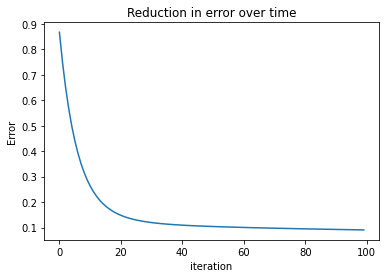

In [ ]:
%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

In [ ]:
y_hat = lr.predict(X_test)
Adj_R = 1 - (1-lr.score(X_test, y_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R-squared:", Adj_R )

Adjusted R-squared: 0.9114445609103706


## Using Scikit learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/03_Apr23_Inter_Aug23_Adv_Feb23_Begi_w:o_Python_Mar23_Inter_Oct22_Beg_Tue_Sept22 Begi_Tue/Intro_to_ML/05_Regression_4/cars24-car-price-cleaned.csv
100%|██████████████████████████████████████| 1.69M/1.69M [00:00<00:00, 3.56MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [ ]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train.shape, y_train.shape

((13874, 17), (13874,))

In [ ]:
X_test.shape, y_test.shape

((5946, 17), (5946,))

Univariate

In [ ]:
X1=X[['model']]
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.9967642])

In [ ]:
model.intercept_

0.0015237505846125154

In [ ]:
y_hat = model.predict(X1)

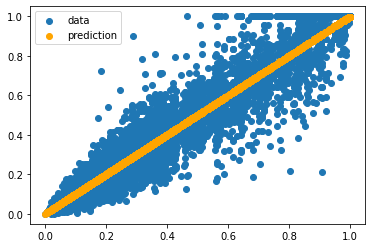

In [ ]:
fig = plt.figure()
plt.scatter(X1,y,label='data')
plt.scatter(X1,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

Multivariate

In [ ]:
print(X.shape, y.shape)

(19820, 17) (19820,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 7.24834810e+11, -2.55249023e-01, -2.31834412e-01,  7.44266510e-02,
        4.69055176e-02,  7.24834810e+11,  6.60839081e-02,  8.58764648e-01,
       -7.11822510e-03, -7.02285767e-03,  6.84356689e-03,  1.32909596e-01,
        1.49879456e-02, -6.79779053e-03, -3.44848633e-03, -1.61848068e-02,
       -2.35977173e-02])

In [ ]:
model.intercept_

-724834810251.1912

No handles with labels found to put in legend.


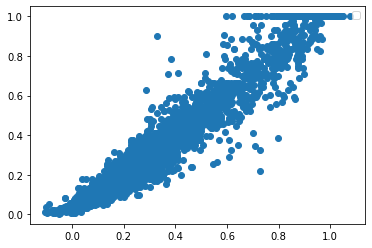

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
y_hat = model.predict(X_test)
plt.scatter(y_hat,y_test)

plt.legend()
plt.show()

In [ ]:
model.score(X_train, y_train)

0.9459006122528419

In [ ]:
model.score(X_test, y_test)

0.9459859520373978

In [ ]:
model.coef_

array([ 7.24834810e+11, -2.55249023e-01, -2.31834412e-01,  7.44266510e-02,
        4.69055176e-02,  7.24834810e+11,  6.60839081e-02,  8.58764648e-01,
       -7.11822510e-03, -7.02285767e-03,  6.84356689e-03,  1.32909596e-01,
        1.49879456e-02, -6.79779053e-03, -3.44848633e-03, -1.61848068e-02,
       -2.35977173e-02])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

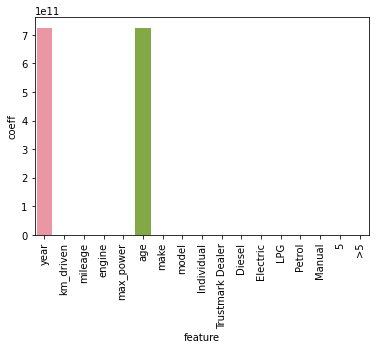

In [ ]:
import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

In [ ]:
X_test.columns[np.argmax(np.abs(model.coef_))] # Most Important

'year'

In [ ]:
X_test.columns[np.argmin(np.abs(model.coef_))] # Least Important

'Manual'

## Using Statsmodel

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 24.1MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
y=df[['selling_price']]
X=df.drop('selling_price', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
y_train = np.array(y_train)

In [ ]:
X_train

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
3443,-0.488480,0.170967,-0.908259,0.041071,0.406096,0.488480,-0.177218,-0.432940,-0.800710,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,-2.016868,0.444503,-0.424728
16090,0.762867,-0.447817,0.234219,-0.921213,-0.694426,-0.762867,-0.433854,-0.548397,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
11070,0.450030,1.389198,0.483191,-0.439107,-0.210518,-0.450030,-0.639625,-0.453932,1.248892,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,-2.016868,0.444503,-0.424728
19214,1.075704,-0.287977,-0.312588,-0.539385,-0.252966,-1.075704,-0.246579,-0.275499,-0.800710,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
17843,-1.114153,-0.196436,-0.768649,0.033357,0.265347,1.114153,-0.327501,-0.695343,1.248892,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1.388540,-0.559005,-1.355012,1.768939,1.109840,-1.388540,0.724475,2.432495,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,-2.249703,2.354446
18898,1.075704,-0.764944,0.580918,-0.537456,-0.364671,-1.075704,-0.433854,-0.432940,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
11798,0.450030,-0.302209,-0.980391,0.222343,0.517801,-0.450030,-0.327501,0.391004,-0.800710,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
6637,-0.488480,-0.834557,-0.145056,1.001426,1.918587,0.488480,3.360773,2.820851,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,-2.016868,0.444503,-0.424728


In [ ]:
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:06:21   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.664e-05      0.002  

In [ ]:
results.predict(X_sm)

3443    -0.354511
16090   -0.476414
11070   -0.359932
19214   -0.121763
17843   -0.656579
           ...   
1099     2.335550
18898   -0.334020
11798    0.398398
6637     2.564373
2575    -0.076645
Length: 15856, dtype: float64

In [ ]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:43:15   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.002     -0.223      0.8

# **Linear Regression Assumptions**

### Multicollinearity and Variance Inflation Factor[VIF]

#### Undersanding

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
# X_t.values enters all the values with out column & row index
# i refer to feature index which is to be considered as dependent to find its VIF
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Removing the features with very high VIF values

In [ ]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

In [ ]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['year']
while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
    vif['Features'] = cols2
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    cols2 = vif["Features"][1:].values
    X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

    X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
    sm_model = sm.OLS(list(y_train), X2_sm).fit()
    if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
        print('Reached threshold')
        print('Highest vif:',vif.iloc[0])
        print('Current adj.R2',sm_model.rsquared_adj)
        print('Features removed:', i)
        print('List of features removed:', feats_removed)
        break
    feats_removed.append(vif.iloc[0]['Features'])
    i += 1

In [ ]:
print(vif)
print(sm_model.summary())

#### Code for High Multicollinear Features Deletion

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
df = pd.read_csv('cars24-car-price-clean.csv')

#Initial Assessment of the Data
y=df['selling_price']
X=df.drop('selling_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

print()
print("*******************************************************************************************************************************")
print()

# Iterative code for auto removing High VIF features with keeping VIF & R2 Threshold values
vif_thr = 5
r2_thr = 0.80
j = 1
feats_removed = []
cols2 = X_train.columns
while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
    vif['Features'] = cols2
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    cols2 = vif["Features"][1:].values
    X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2] #Dropped the feature with high VIF & Again check Perfromance of the reamining data

    X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
    sm_model = sm.OLS(list(y_train), X2_sm).fit()
    if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
        print('Reached threshold')
        print('Highest vif:',vif.iloc[0])
        print('Current adj.R2',sm_model.rsquared_adj)
        print('Features removed:', j-1)
        print('List of features removed:', feats_removed)
        break
    feats_removed.append(vif.iloc[0]['Features']) # Addting the high VIF removed feature name to feats_removed
    j += 1
print()
print("*******************************************************************************************************************************")
print()
# Final Assesment of Data after removing all possible high VIF feature with set Threshold values
print(vif)
print(sm_model.summary())


Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 107MB/s]
                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:01:09   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t 

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Reached threshold
Highest vif: Features    max_power
VIF              2.71
Name: 0, dtype: object
Current adj.R2 0.7978180731672628
Features removed: 5
List of features removed: ['year', 'Petrol', '>5', 'engine', 'model']

*******************************************************************************************************************************

            Features   VIF
0          max_power  2.71
1               make  2.33
2            mileage  2.24
4             Manual  1.66
5             Diesel  1.53
6                  5  1.45
3                age  1.31
7          km_driven  1.20
8           Electric  1.17
9         Individual  1.08
10  Trustmark Dealer  1.02
11               LPG  1.01
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:        

### Normality of Residuals

In [ ]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

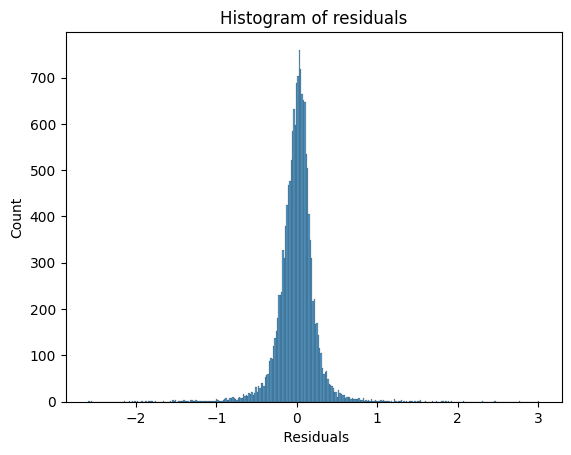

In [ ]:
import seaborn as sns
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

## Mean of Residuals

In [ ]:
np.mean(yhattrain-ytrain)

-4.929390229335695e-16

In [ ]:
np.mean(yhattest-ytest)

0.006100917484111618

* Mean of Residuals are almost equivalent to Zero

## Linearity of variables

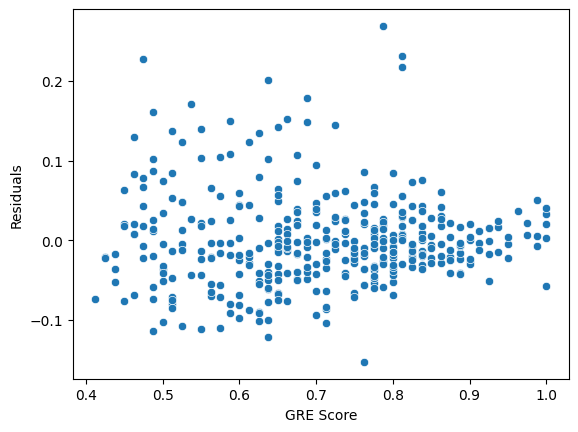

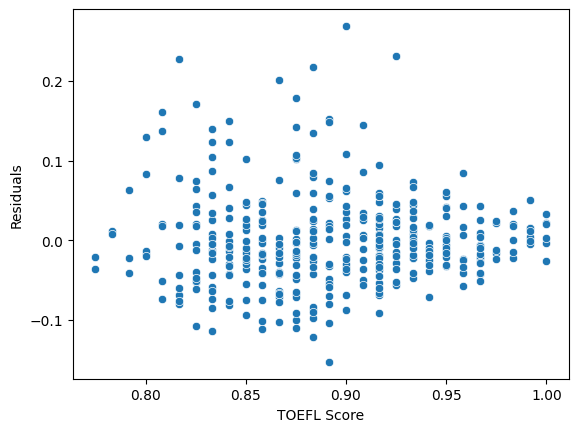

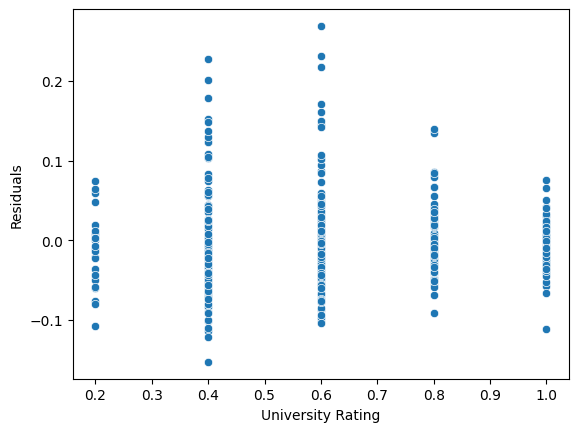

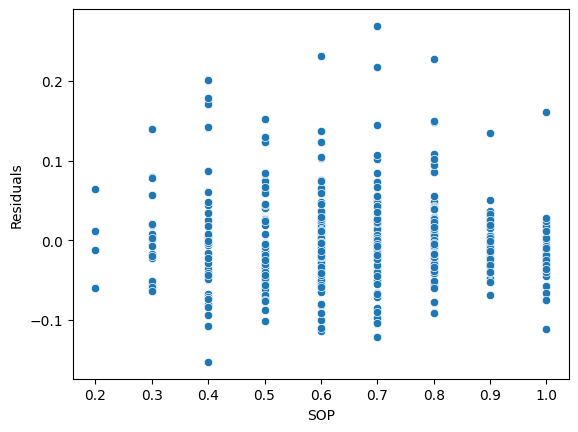

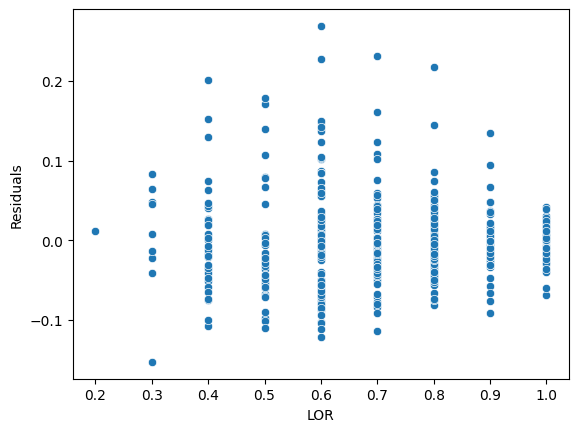

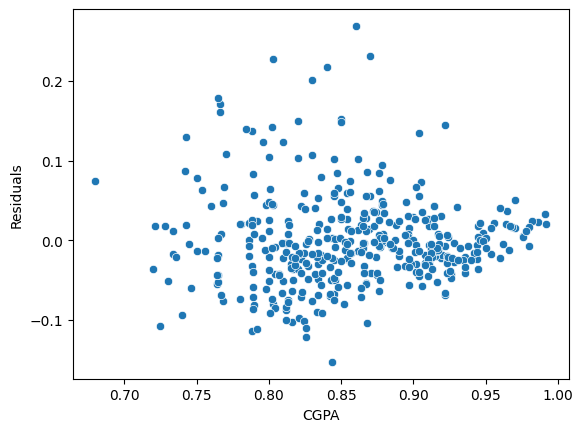

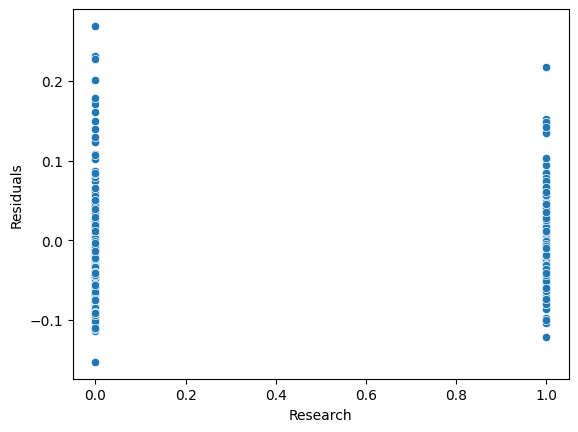

In [ ]:
for i in Xtrain.columns:
  sns.scatterplot(x=Xtrain[i],y=(yhattrain-ytrain))
  plt.xlabel(i)
  plt.ylabel("Residuals")
  plt.show()

* We can say No Rigid pattern observed for Residual w.r.t Features

In [ ]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic
## Closer the value to 1, more is the normality.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.8526061177253723

## No Heteroskedasticity

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

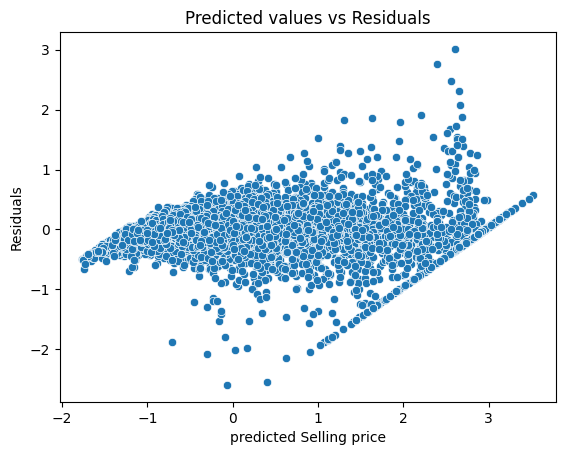

In [ ]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

# **Regularization**

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
data = datasets.load_diabetes()

In [ ]:
data

In [ ]:
X = data['data']

y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transform the features into polynomial features
degree = 10
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
# Standardize the polynomial features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train_poly_scaled , y_train)




LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
output = model.predict(X_test_poly_scaled)
print('MSE for test:', mean_squared_error(y_test, output))

output = model.predict(X_train_poly_scaled)
print('MSE for train:', mean_squared_error(y_train, output))

MSE for test: 148108.35996367494
MSE for train: 2.0775197660902018e-23


## Lasso and Ridge

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso_model = Lasso(alpha=0.01)  # Alpha is the regularization strength
ridge_model = Ridge(alpha=1.0)    # Alpha is the regularization strength

In [ ]:
# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.558e+04, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


Ridge()

In [ ]:
lasso_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

test MSE for L1: 36918.32497911996
test MSE for L2: 115404.51869417798


# **Polynomial Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect

0.9345996128366808


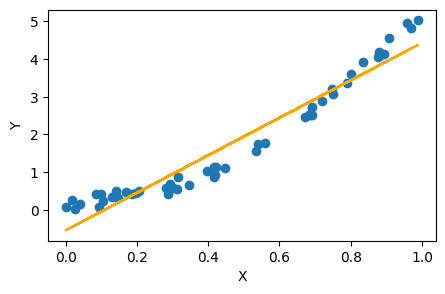

In [ ]:
from sklearn.linear_model import LinearRegression



model = LinearRegression()
model.fit(X, y)

output = model.predict(X)

print(model.score(X,y))

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.plot(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



In [ ]:
def adj_r(r_sq,X):
  adj_r1 = (1 - ((1-r_sq)*(X.shape[0]-1))/(X.shape[0]-X.shape[1]-1) )
  return adj_r1

In [ ]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

R-square: 0.9948973526246709
Adj. R-square: 0.9947910474710182


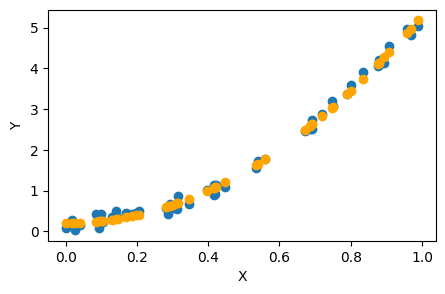

In [ ]:
#adding new feature X^2
X_deg2 = np.hstack([X, X**2])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)

print("R-square:",model_deg2.score(X_deg2, y))
print('Adj. R-square:', adj_r(r2_score(y,output),X ) )
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


R-square: 0.994924691754525
Adj. R-square: 0.9948189561660776


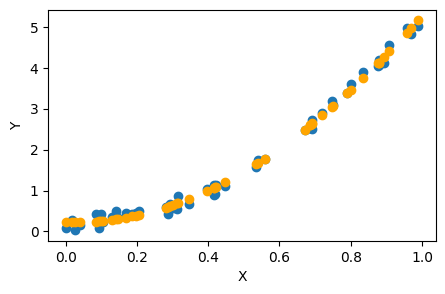

In [ ]:
#adding new feature X^3
X_deg3 = np.hstack([X, X**2,X**3])
model_deg3 = LinearRegression()
model_deg3.fit(X_deg3, y)
output = model_deg3.predict(X_deg3)

print("R-square:",model_deg3.score(X_deg3, y))
print('Adj. R-square:', adj_r(r2_score(y,output),X) )
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

* Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

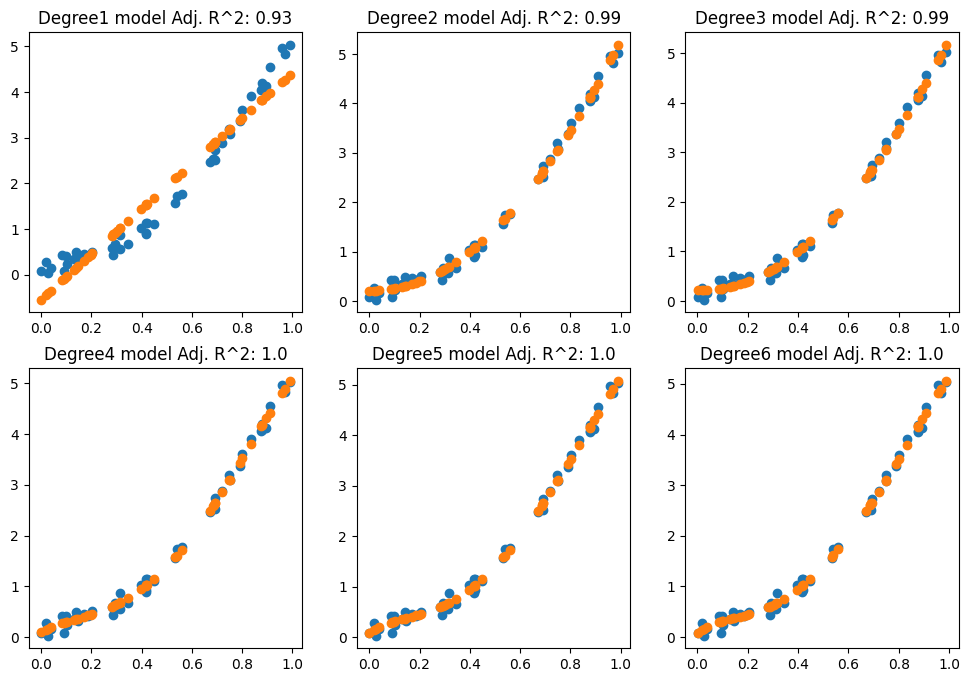

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 6, and seeing performance of the model

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
j = 0
for i in range(1, 7):

    #creates polynomial feature
    poly = PolynomialFeatures(i)

    X_poly = poly.fit_transform(X)
    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting

    axes[j,(i-1)%3].scatter(X, y, label="samples")
    axes[j,(i-1)%3].scatter(X, output, label="prediction")
    axes[j,(i-1)%3].set_title(f'Degree{i} model Adj. R^2: {round(adj_r(r2_score(y,output),X_poly_scaled,y ),2)}')

    if(i==3):
      j=1

# **Ridge**

L2 Regularization

* Hard Code using gradient Descent

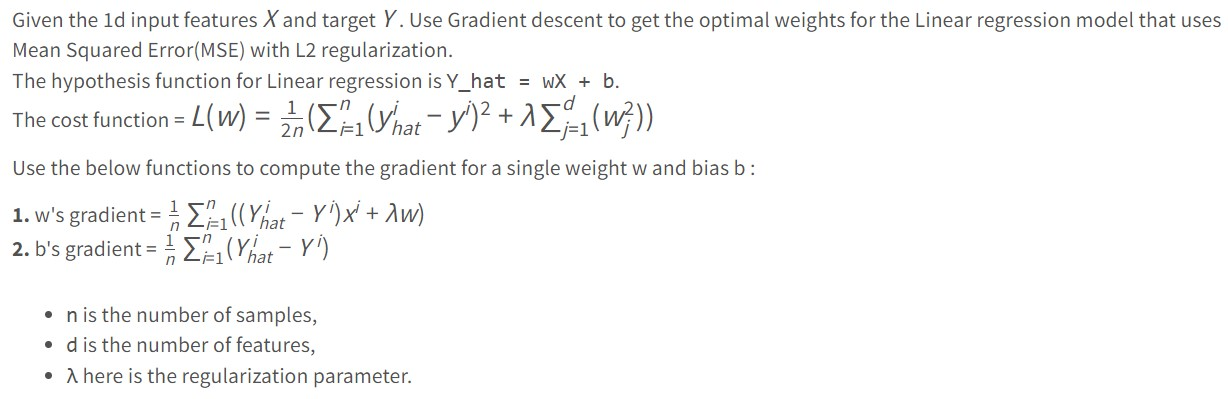

In [ ]:
def L2_reg_update_weights(w, b, X, Y, learning_rate, lambda_value=1):
   X = np.asarray(X)
   Y = np.asarray(Y)

   w_deriv = (np.dot((np.dot(w,X) - Y) ,np.transpose(X)) + lambda_value * w)/ X.shape[0]
   b_deriv = np.sum(np.dot(w,X) - Y)/ X.shape[0]

   w -= learning_rate * w_deriv
   b -= learning_rate * b_deriv

   return(round(w, 2), round(b, 2))

* Code using scikit library

In [ ]:
model = Ridge(alpha = 1)
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

# **Lasso**

L1 Regularization

In [ ]:
def L1_reg_update_weights(w, b, X, Y, learning_rate, lambda_value=1):
   X = np.asarray(X)
   Y = np.asarray(Y)
   w1 =

   w_deriv = (np.dot((np.dot(w,X) - Y) ,np.transpose(X)) + lambda_value/2 * np.sign(w))/ X.shape[0])
   b_deriv = np.sum(np.dot(w,X) - Y)

   w -= learning_rate * w_deriv
   b -= learning_rate * b_deriv

   return(round(w, 2), round(b, 2))

In [ ]:
model = Lasso(alpha = 1)
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

In [ ]:
import numpy
numpy.sign([1,-3,-45,-65869,0])

array([ 1, -1, -1, -1,  0])

# **ElasticNet**

Both L1 & L2 Normalization used together with user inputted l1ratio of regularization constant

* l1_ratio = 0 --> Complete L2 Normalization
* l1_ratio = 1 --> Complete L1 Normalization

* 1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

In [ ]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X,y)
print(model.intercept_)
print(model.coef_)
model.predict(Xtest)

# **Hyperparameters**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# lets generate a dataset of 100 points
np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)

#0.8, 0.2 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
# sklearn.pipeline.make_pipeline(*steps, memory=None, verbose=False)
# *steps --> list of Estimator objects
List of the scikit-learn estimators that are chained together.
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
def adj_r2(X, y, r2_score):
  return 1 - ((1-r2_score)*(len(y)-1))/(len(y)-X.shape[1]-1)

In [ ]:
train_scores = []
test_scores = []
rate_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
scaler = StandardScaler()
for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(10), scaler, Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = polyreg_scaled.score(X_train, y_train)
  test_score= polyreg_scaled.score(X_test, y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

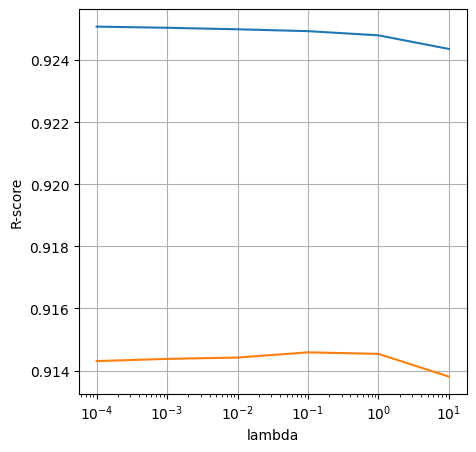

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="test")
plt.xlabel("lambda")
plt.ylabel("R-score")
plt.xscale("log")
plt.grid()
plt.show()

In [ ]:
print("Best lambda:", rate_list[np.argmax(test_scores)])

Best lambda: 0.1


# **Cross Validation**

## Normal

In [ ]:
# lets generate a dataset of 100 points
np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)


In [ ]:
#0.6, 0.2, 0.2 split
from sklearn.model_selection import train_test_split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((600, 1), (200, 1), (200, 1))

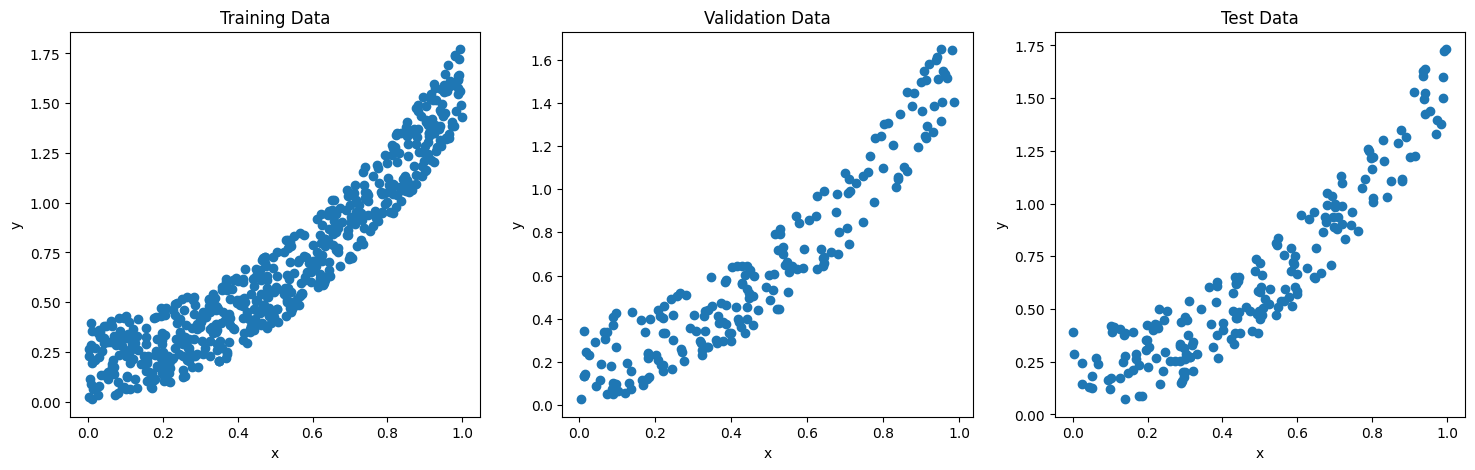

In [ ]:
plt.figure(figsize=(18,5))
data_labels = ["Training Data", "Validation Data", "Test Data" ]
x_labels = [X_train, X_val, X_test]
y_labels = [y_train, y_val, y_test]
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.scatter(x_labels[i], y_labels[i])
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(data_labels[i])

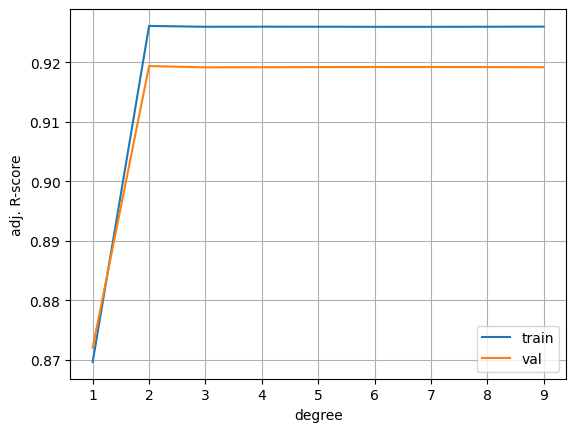

In [ ]:
# Same as we did earlier and in the last lecture
max_degree = 10 # max polynomial degree
train_scores = []
val_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
    polyreg_scaled.fit(X_train, y_train)
    train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
    val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
    train_scores.append(train_score)
    val_scores.append(val_score)
plt.figure()
plt.plot(list(range(1, max_degree)), train_scores, label="train")
plt.plot(list(range(1, max_degree)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [ ]:
train_scores = []
val_scores = []
rate_list = [0.01, 0.1, 1,5, 10]
for rate in rate_list:
    polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=rate))
    polyreg_scaled.fit(X_train, y_train)
    train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
    val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
    train_scores.append(train_score)
    val_scores.append(val_score)

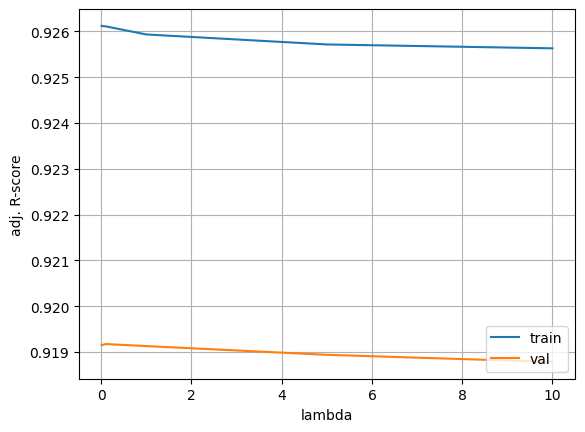

In [ ]:
plt.figure()
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [ ]:
polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=0.01))
polyreg_scaled.fit(X_train, y_train)
train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
print(f'Training Score = {train_score}')
val_score = adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
print(f'Validation Score = {val_score}')

Training Score = 0.9261212571628987
Validation Score = 0.9191482611247953


In [ ]:
# Reporting this as the final score
test_score = adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
print(f'Testing Score = {test_score}')

Testing Score = 0.9143625261065258


In [ ]:
# Creating a small dataset of 100 data points
np.random.seed(2)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

## K-Fold

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [ ]:
# Performing k-fold cross validation
degrees = 10 # number of degrees
train_scores = []
val_scores = []

for degree in range(1, degrees):
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in kf.split(X): #iterating through the K-folds

        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
        polyreg_scaled.fit(X_train, y_train) #training model

        train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
        val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))

        fold_train_scores.append(train_score)
        fold_val_scores.append(val_score)

    train_score = np.mean(fold_train_scores)
    val_score = np.mean(fold_val_scores)

    train_scores.append(train_score)
    val_scores.append(val_score)

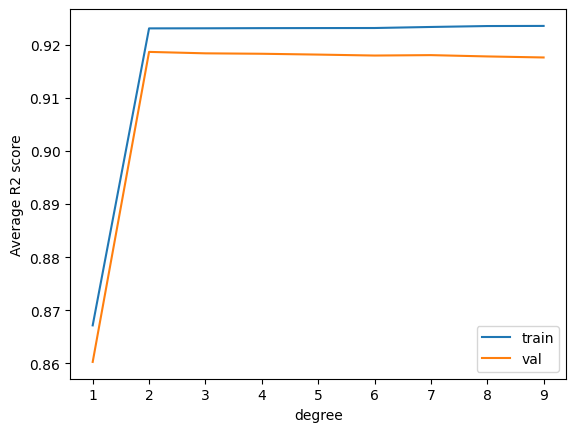

In [ ]:
plt.figure()
plt.plot(list(range(1, degrees)), train_scores, label="train")
plt.plot(list(range(1, degrees)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("Average R2 score")
plt.show()

# **Linear Regression Metrics**

## Model Results

In [ ]:
# Calculating the Predicted Values (yhat) of training data
yhattrain = results.predict(Xtrain1)

In [ ]:
# Calculating the Predicted Values (yhat) of testing data
Xtest1 = sm.add_constant(Xtest)
yhattest = results.predict(Xtest1)

In [ ]:
results.params.sort_values(ascending = False)

CGPA                 0.561533
GRE Score            0.169155
TOEFL Score          0.131429
LOR                  0.103283
Research             0.039244
University Rating    0.030733
const                0.022418
SOP                  0.013592
dtype: float64

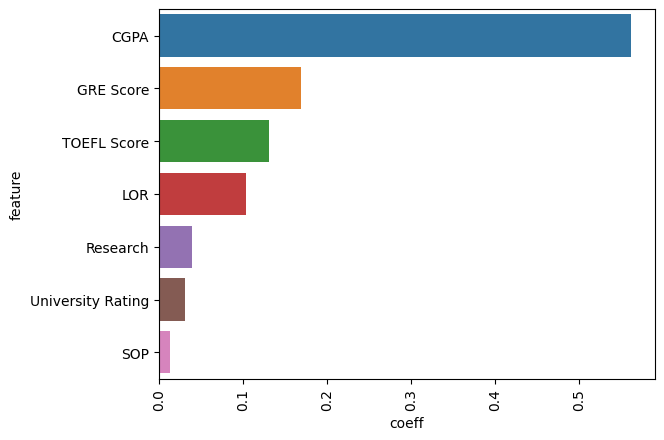

In [ ]:
weights = pd.DataFrame(list(zip(Xtest.columns,np.abs(results.params[1:]))),
                   columns=['feature', 'coeff'])
weights.sort_values(by = "coeff", ascending = False, inplace = True)
sns.barplot(y='feature', x='coeff', data=weights)
plt.xticks(rotation=90)
plt.show()

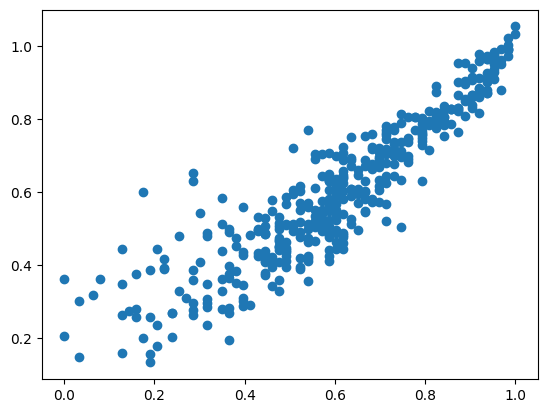

In [ ]:
plt.scatter(ytrain, yhattrain)

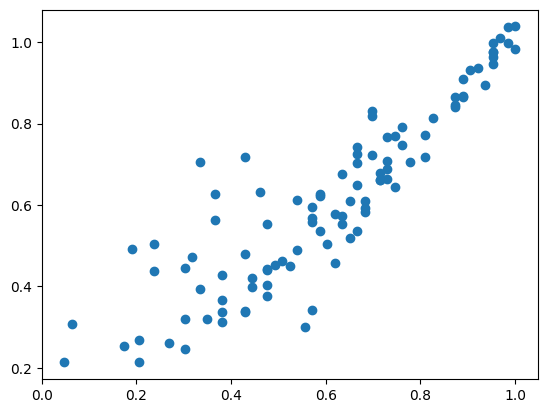

In [ ]:
plt.scatter(ytest, yhattest)

* from Yhat and yactual plot we can say , model is predicting good

* Now lets check R-square of Testing & Training data

## R-Square

In [ ]:
# R-square Using OLS Attribute for Training data
results.rsquared

0.8292848575410212

In [ ]:
# R-square for training data
1 - np.sum((ytrain - yhattrain)**2)/np.sum((ytrain - ytrain.mean())**2)

0.8292848575410212

In [ ]:
# R-square for testing data
1 - np.sum((ytest - yhattest)**2)/np.sum((ytest - ytest.mean())**2)

0.7927364356781469

* **From R-square Values of Test & Train Data, we can say model is neither Overfit nor Underfit**
* **It is appropriately Fit**

## R-Square Adjusted

In [ ]:
# used defined function for R-Square Adjusted
def R2adj(X,R2):
  return (1 - (1-R2) * ((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)))

In [ ]:
R2adj(Xtrain,results.rsquared)

0.8262363728542538

In [ ]:
# R-square adjusted Using OLS Attribute for Training data
results.rsquared_adj

0.8262363728542538

In [ ]:
# R-square adjusted for training data
R2= 1 - np.sum((ytrain - yhattrain)**2)/np.sum((ytrain - ytrain.mean())**2)
1 - (1-R2) * ((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1))

0.8262363728542538

In [ ]:
# R-square adjusted for testing data
R2= 1 - np.sum((ytest - yhattest)**2)/np.sum((ytest - ytest.mean())**2)
1 - (1-R2) * ((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1))

0.7769663818710494

* **From Comparison of R-Square and R-Square Adjusted, we see difference b/w R-Square & R-Square adj for Training [0.829 - 0.826 = 0.003] , for testing [ 0.792 - 0.776 = 0.016] is very small**
* **So we can conclude there are no irrelevant features inline with our earlier Hypothesis Testing**

## Mean Absolute Error

In [ ]:
# MAE for Training data
(np.sum(np.abs(ytrain-yhattrain)))/len(ytrain)

0.06568270842637872

In [ ]:
# MAE for testing data
(np.sum(np.abs(ytest-yhattest)))/len(ytest)

0.07509931877554368

* Both Test & Train data MAE Values are very low meaning our model is performing good

## Root Mean Square Error

In [ ]:
# RMSE for Training data
((np.sum((ytrain-yhattrain)**2))**0.5)/len(ytrain)

0.004579977329232789

In [ ]:
# RMSE for testing data
((np.sum((ytest-yhattest)**2))**0.5)/len(ytest)

0.010564357955452694

* Both Test & Train data RMSE Values are very low meaning our model is performing good

# **Logistic Regression**

* Classification = Logistic Regression
* We use Sigmoid function to Convert (-inf,inf)(perpendiuclar distance from classifier) -->(0,1)(propability of it lying in classifier Normal direction (+ve side ))

In [ ]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 125MB/s]


In [ ]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [ ]:
churn['Churn'].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

In [ ]:
def sigmoid(x):
    return 1/(1+np.e**-x)

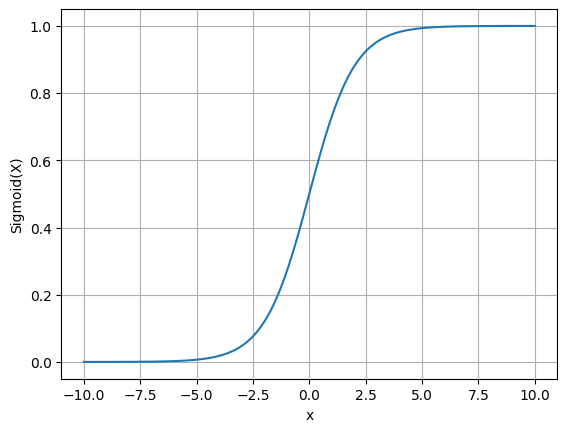

In [ ]:
x = np.linspace(-10, 10, 100) # 100 equidistant points between -10 and 10
y = sigmoid(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

In [ ]:
# Loss for a single point
def log_loss(y, y_hat):
  loss = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
  return -loss

In [ ]:
# Case 1, yi=1, high pi
log_loss(1, 0.99)

0.01005033585350145

In [ ]:
# Case 2, yi = 1, pi =0.5

log_loss(1, 0.5)

0.6931471805599453

In [ ]:
# Case 3, yi = 1, low pi

log_loss(1, 0.1)

2.3025850929940455

In [ ]:
#Churn prediction in telecom.
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 103MB/s]


In [ ]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [ ]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
X = churn[cols]
X.shape

(5700, 5)

In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
X_train.shape

(3420, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-1.8525591 , -0.54121117,  1.87596728,  0.0724823 ,  2.13378709],
       [ 0.93155078,  1.05292599,  0.39854651, -0.54879454, -0.81991418],
       [ 0.46912157,  0.11462924,  1.13324217,  0.0724823 , -2.27130187],
       ...,
       [-0.52565742, -0.04014136, -0.68543069,  0.69375914,  0.55508469],
       [-0.94359172, -0.58957698, -0.37428909,  1.93631281, -0.36158122],
       [-0.58604336,  2.40910335,  1.70935597,  0.69375914, -0.25972945]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[0.6844725 , 0.29104522, 0.13637423, 0.79640697, 0.0613349 ]])

In [ ]:
model.intercept_

array([-0.01215015])

In [ ]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
def accuracy(y_true, y_pred):
    return np.sum(y_true==y_pred)/y_true.shape[0]

In [ ]:
# Accuracy for training data
accuracy(y_train, model.predict(X_train))

0.7058479532163743

In [ ]:
# Accuracy for validation data
accuracy(y_val, model.predict(X_val))

## Binomial

In [ ]:
model = LogisticRegression()
model.fit(X,y)
print(model.intercept_)
print(model.coef_)
model.predict(Xtest)

## One Versus all

* It is a logistic regression algorithm that is used when the target variable has two or more classes. It trains one logistic regression model for each class, with that class as the positive class and all other classes as the negative class. It predicts the probability of each class and selects the class with the highest probability as the predicted class.

In [ ]:
model = LogisticRegression(multi_class = "ovr",solver='liblinear')
model.fit(Xtrain,ytrain)
model.predict(Xtest)

## Multinomial

* It is a logistic regression algorithm that is used when the target variable has more than two classes. It predicts the probability of each class and selects the class with the highest probability as the predicted class

In [ ]:
model = LogisticRegression(multi_class ='multinomial',solver='lbfgs')
model.fit(Xtrain,ytrain)
model.predict(Xtest)

## Hyperparameter tuning


In [ ]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda (Regularization Constant)
    scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train, y_train)
    train_score = accuracy(y_train, scaled_lr.predict(X_train))
    val_score = accuracy(y_val, scaled_lr.predict(X_val))
    train_scores.append(train_score)
    val_scores.append(val_score)

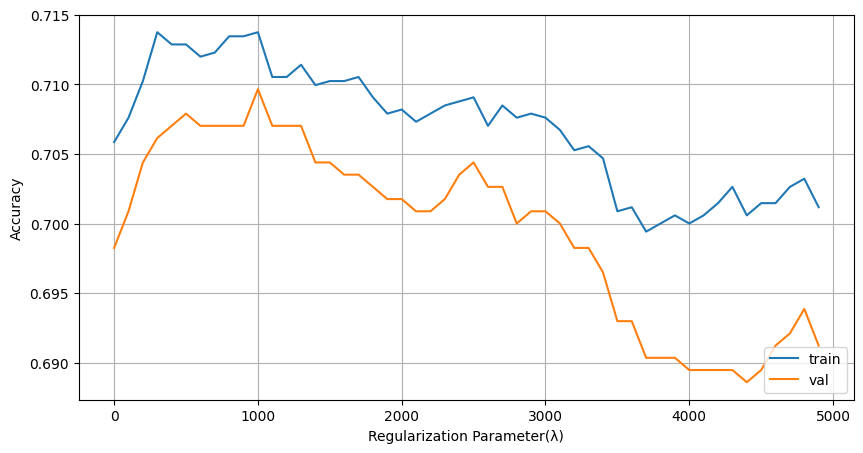

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
model = LogisticRegression(C=1/1000)
model.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [ ]:
accuracy(y_train, model.predict(X_train))

0.7137426900584796

In [ ]:
accuracy(y_val, model.predict(X_val))

0.7096491228070175

In [ ]:
accuracy(y_test, model.predict(X_test))

0.7096491228070175

# Multi Class Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
# dataset creation with 3 classes
from sklearn.datasets import make_classification

X, y = make_classification(n_samples= 498,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
y=y.reshape(len(y), 1)

print(X.shape, y.shape)

(498, 2) (498, 1)


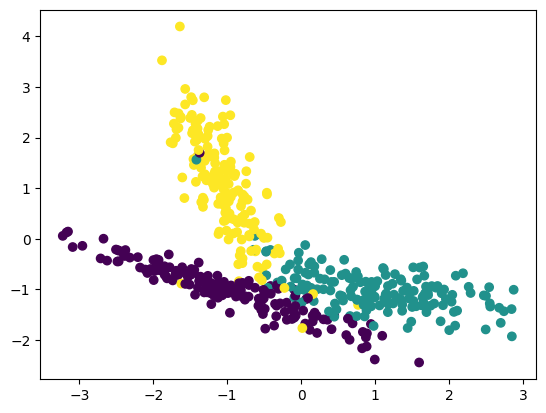

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(298, 2)

In [ ]:
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='ovr')

In [ ]:
print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Validation Accuracy :{model.score(X_val,y_val)}')
print(f'Test Accuracy:{model.score(X_test,y_test)}')

Training Accuracy:0.9161073825503355
Validation Accuracy :0.91
Test Accuracy:0.91


<ipython-input-82-aa3a84c38b50>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


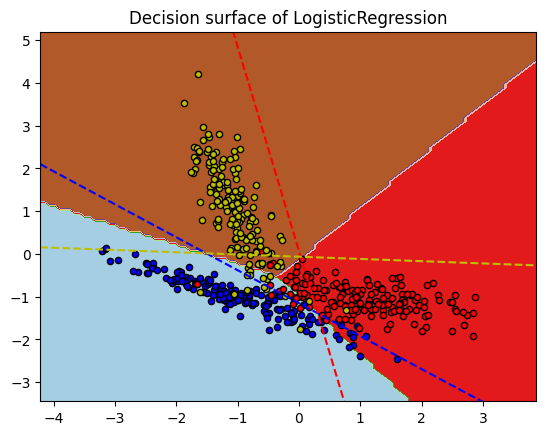

In [ ]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax)
plt.title("Decision surface of LogisticRegression")
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(model.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )


# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

# Classification Metrics


https://medium.com/nerd-for-tech/performance-metrics-for-classification-models-b5602c21315b

 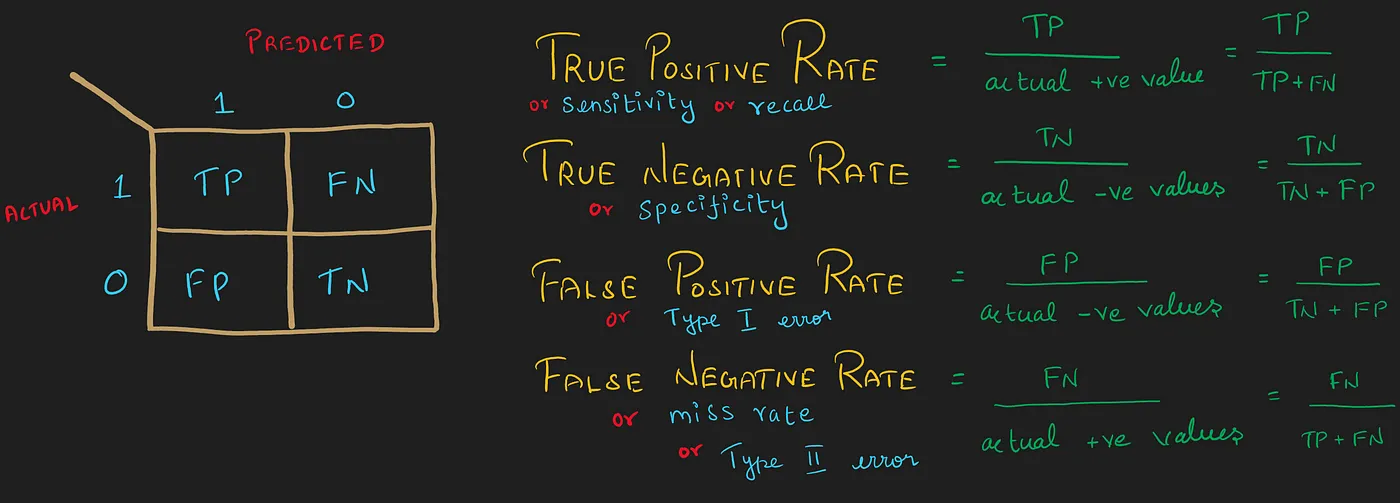

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown 1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V

Downloading...
From: https://drive.google.com/uc?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V
To: /content/spam_ham_dataset.csv
100% 5.50M/5.50M [00:00<00:00, 112MB/s]


In [ ]:
demo1 = pd.read_csv('spam_ham_dataset.csv')
demo1.drop(['Unnamed: 0','label'],axis=1,inplace=True)
demo1.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 133MB/s]


In [ ]:
dt = pd.read_csv('Spam_finalData.csv')

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

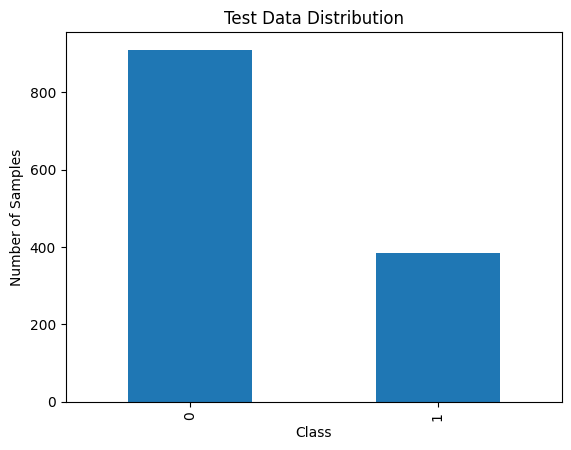

In [ ]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [ ]:
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.9396751740139211


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[860,  49],
       [ 29, 355]])

In [ ]:
from matplotlib import pyplot as plt

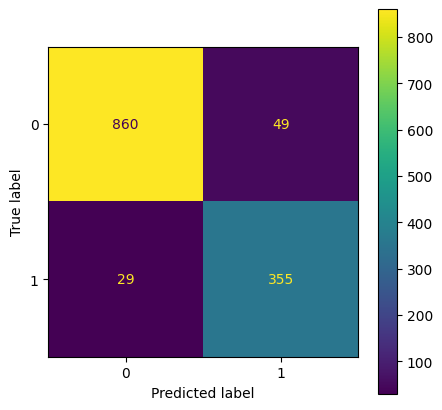

In [ ]:
# ax used here to control the size of confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

Finding Accuracy using Confusion Matrix

In [ ]:
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.9396751740139211

In [ ]:
def precision_calc(conf):
    tp = conf[1,1]
    fp = conf[0,1]

    return tp/(tp+fp)

In [ ]:
precision_calc(conf_matrix)

0.8787128712871287

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8787128712871287

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [ ]:
def recall_calc(conf):
    tp = conf[1,1]
    fn = conf[1,0]

    return tp/(tp+fn)

In [ ]:
recall_calc(conf_matrix)

0.9244791666666666

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.9244791666666666

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
pre = precision_calc(conf_matrix)
re = precision_calc(conf_matrix)

f1 = 2* (pre*re)/(pre+re+1e-6)

print(f'f1Score:{f1}')

f1Score:0.8787123712874133


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(f'f1Score:{f1_score(y_test,y_pred)}')

f1Score:0.9010152284263959


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
probability = model.predict_proba(X_test)

In [ ]:
probability

array([[0.41780926, 0.58219074],
       [0.76850792, 0.23149208],
       [0.4283516 , 0.5716484 ],
       ...,
       [0.86554959, 0.13445041],
       [0.9453275 , 0.0546725 ],
       [0.87505127, 0.12494873]])

In [ ]:
probabilites = probability[:,1]

In [ ]:
fpr, tpr, thr = roc_curve(y_test,probabilites)

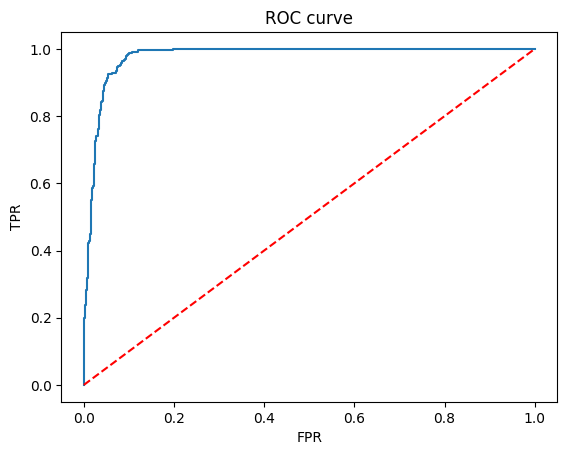

In [ ]:
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
# AUC
roc_auc_score(y_test,probabilites)

0.9779319077741108

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
precision, recall, thr = precision_recall_curve(y_test, probabilites)

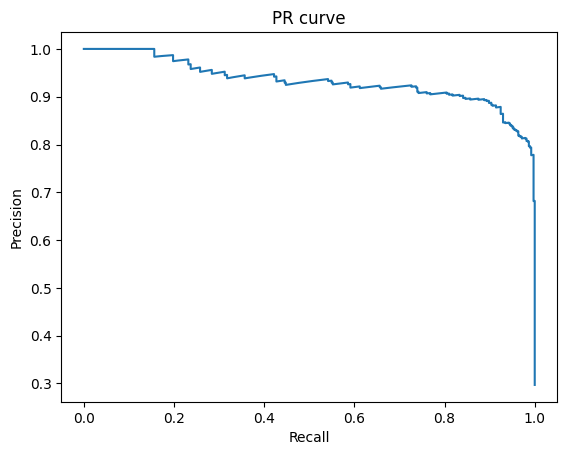

In [ ]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.9329519420016692

## F-Beta Score

* A default beta value is 1.0, which is the same as the F-measure.
* A smaller beta value, such as 0.5, gives more weight to precision and less to recall [when FP has more impact than FN ]
* whereas a larger beta value, such as 2.0, gives less weight to precision and more weight to recall in the calculation of the score [ When FN has more impct than FP]

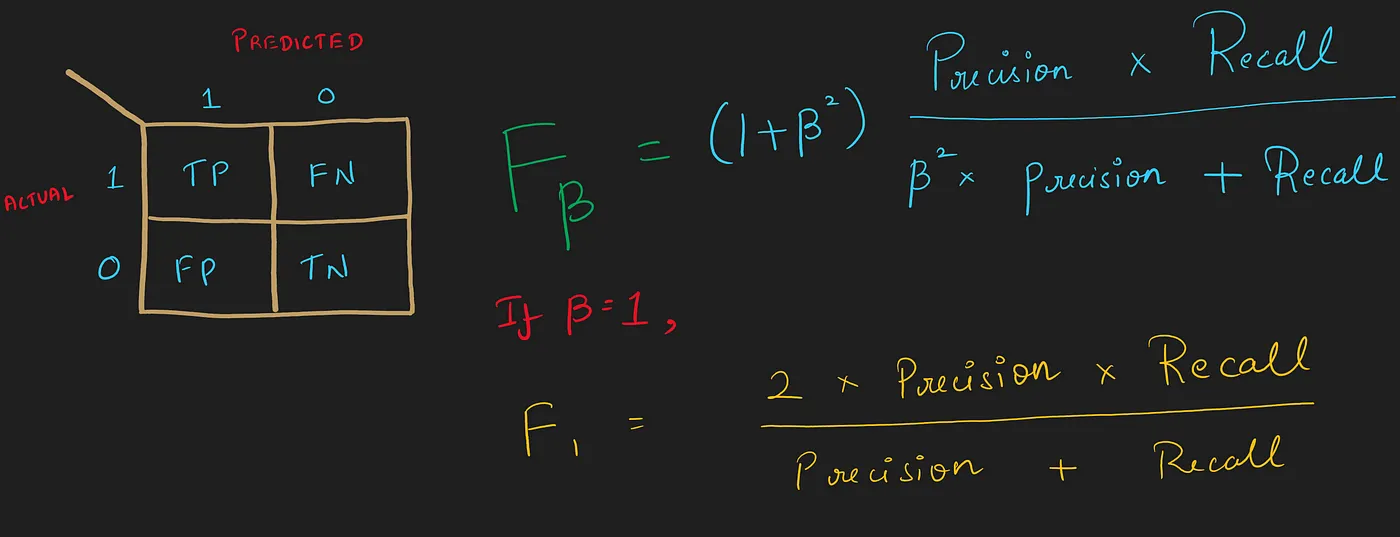

In [ ]:
# (1 + beta**2)(Precision * Recall)/( (beta**2 * Precision) + Recall )
from sklearn.metrics import fbeta_score
y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [1,1,1,1,1,1,1,1,1,1]
f= fbeta_score(y_true, y_pred, beta = 0.5)
print('F=', f)

F= 0.5555555555555556


# Class Imbalance

https://imbalanced-learn.org/stable/introduction.html

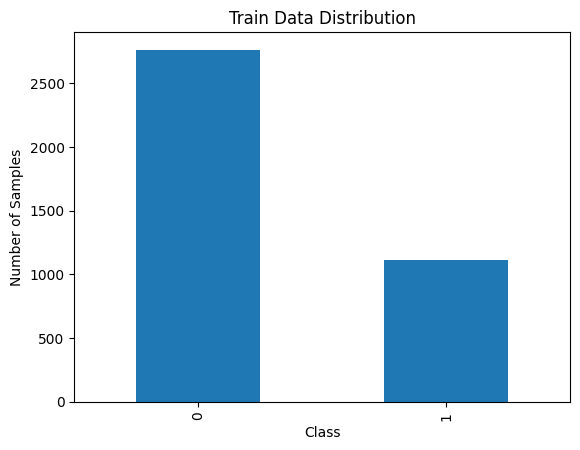

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Train Data Distribution')
plt.show()

In [ ]:
y_train.value_counts()

0    2763
1    1115
Name: label_num, dtype: int64

In [ ]:
2763/1115

2.4780269058295965

In [ ]:
# Model creation, prediction

def training(model,X_train,y_train,X_test,y_test):

    model.fit(X_train, y_train)

    train_y_pred = model.predict(X_train)
    test_y_pred = model.predict(X_test)

    train_score = f1_score(y_train, train_y_pred)
    test_score = f1_score(y_test, test_y_pred)

    return train_score,test_score


In [ ]:
# minority class needs more re-weighting


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(class_weight={0:1,1:2.47})

f1_train,f1_test = training(model,X_train,y_train,X_test,y_test)
print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Training F1 score:0.8376327769347496, Testing F1 score:0.8734321550741163


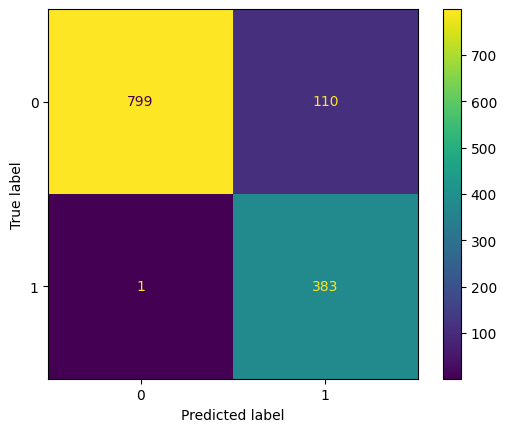

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler()

# Perform oversampling on the training data
print('Before Oversampling')
print(y_train.value_counts())
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression()

f1_train,f1_test = training(model,X_train_oversampled, y_train_oversampled,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before Oversampling
0    2763
1    1115
Name: label_num, dtype: int64
After Oversampling
0    2763
1    2763
Name: label_num, dtype: int64
Training F1 score:0.9248183814833586, Testing F1 score:0.8724373576309796


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()


# Perform SMOTE on the training data
print('Before SMOTE')
print(y_train.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)
print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression(C= 5, penalty= 'l1', solver = 'liblinear')

f1_train,f1_test = training(model,X_sm, y_sm,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')



Before SMOTE
0    2763
1    1115
Name: label_num, dtype: int64
After Oversampling
0    2763
1    2763
Name: label_num, dtype: int64
Training F1 score:0.9491107589364325, Testing F1 score:0.925925925925926
